In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [4]:
data=pd.read_csv('Phishing_Legitimate_full.csv')
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [5]:
print(data.shape)
data.info()

(10000, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents            

In [6]:
float_cols=data.select_dtypes(include=['float64']).columns
for col in float_cols:
    data[col]=data[col].astype('float32')
    
int_cols=data.select_dtypes(include=['int64']).columns
for col in int_cols:
    data[col]=data[col].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [7]:
data.rename(columns={'CLASS_LABEL':'labels'},inplace=True)

data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
2638,2639,3,0,3,59,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,17,35,0,0,1,0,0.909091,0.285714,1,1,0,0,0,0.090909,0,0,0,0,0,1,0,0,1,0,1,1,0,-1,1
7262,7263,2,1,4,86,5,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,23,56,0,0,0,0,0.285714,0.342857,0,1,0,0,0,0.000000,0,0,0,0,1,1,0,0,1,-1,1,1,0,1,0
6340,6341,1,0,2,61,6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,10,44,0,0,0,0,0.255814,0.214286,0,1,0,0,0,0.046512,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0
221,222,3,1,4,63,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,27,29,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1
5186,5187,4,2,5,80,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,31,42,0,0,0,0,0.192308,0.111111,0,1,0,0,0,0.000000,0,0,0,0,1,1,0,0,0,-1,1,1,1,1,0


In [8]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

<AxesSubplot:>

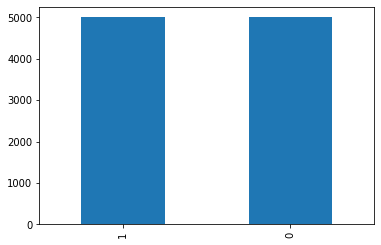

In [9]:
data['labels'].value_counts().plot(kind='bar')

In [10]:
#Spearman Correlation

def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp=data.iloc[:,idx_s:idx_e]   
    if 'id' in temp.columns:
        del temp['id']
    temp['labels']=y
    sns.heatmap(temp.corr(),annot=True,fmt='.2f')
    plt.show()

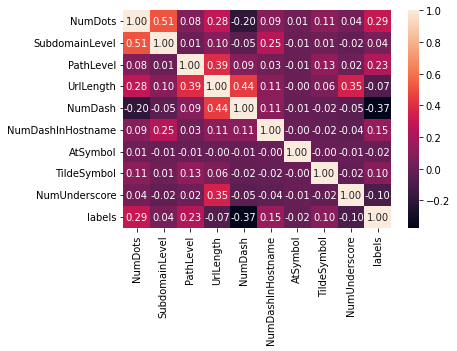

In [11]:
corr_heatmap(data, 0, 10)

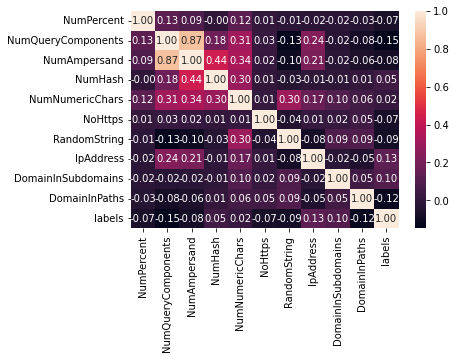

In [12]:
corr_heatmap(data, 10, 20)

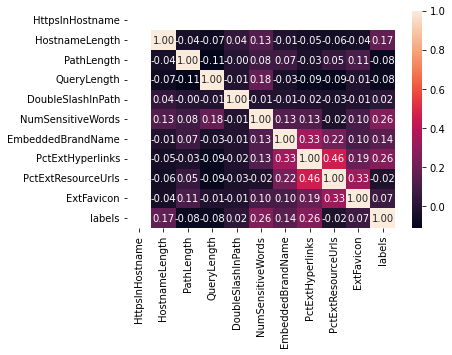

In [13]:
corr_heatmap(data, 20, 30)

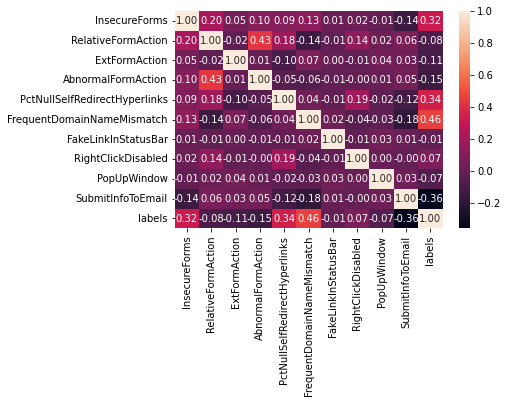

In [14]:
corr_heatmap(data, 30, 40)

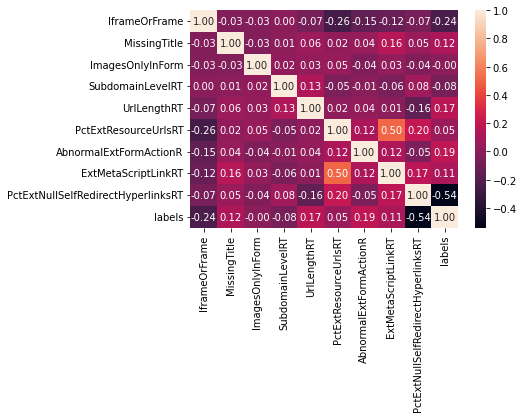

In [15]:
corr_heatmap(data, 40, 50)

In [16]:
#Mutual Information

from sklearn.feature_selection import mutual_info_classif

In [17]:
X=data.drop(['id','labels'],axis=1)
y=data['labels']

In [18]:
discrete_features =X.dtypes == int

In [19]:
mi_score = mutual_info_classif(X, y, discrete_features=discrete_features)

mi_score = pd.Series(mi_score, name="MI Scores", index=X.columns)

mi_score = mi_score.sort_values(ascending=False)

mi_score

PctExtHyperlinks                      4.686881e-01
PctExtResourceUrls                    2.922393e-01
PctNullSelfRedirectHyperlinks         2.357816e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

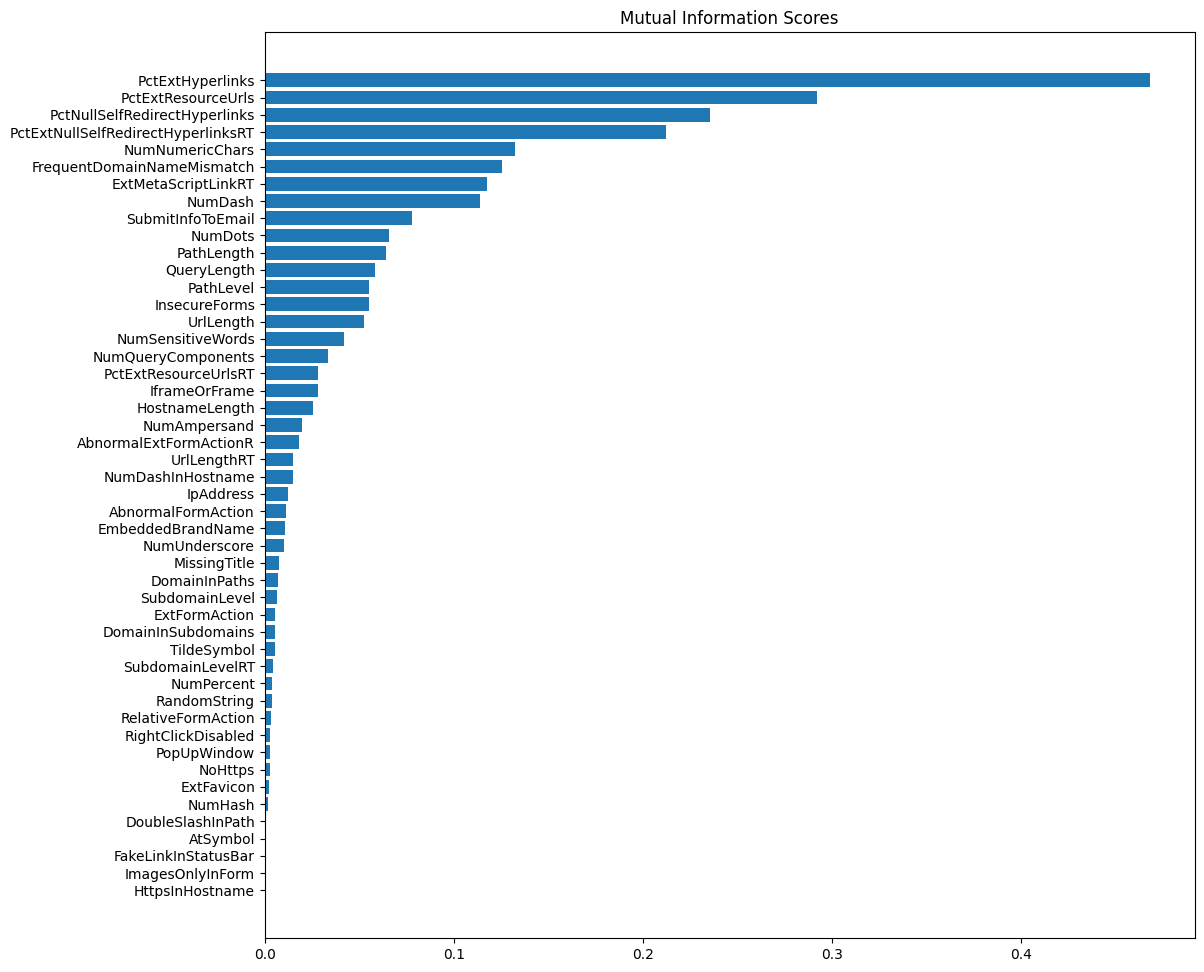

In [20]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width =np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')
    
plt.figure(dpi=100, figsize=(12, 12))
plot_mi_scores(mi_score)

In [31]:
#Prediction 

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [24]:
#Train Logistic Model

def train_logistic(data, top_n):
    top_n_fetures = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X =data[top_n_fetures]
    y =data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred =lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [25]:
arr = []
for i in range(20 ,51 ,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print('Performance for Logistic Model with Top {} features is precision: {}, recall: {}, f1: {}, accuracy: {}'.format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision: 0.9271844660194175, recall: 0.9390363815142576, f1: 0.9330727894479727, accuracy: 0.9315
Performance for Logistic Model with Top 21 features is precision: 0.911504424778761, recall: 0.9288577154308617, f1: 0.9200992555831264, accuracy: 0.9195
Performance for Logistic Model with Top 22 features is precision: 0.9249512670565302, recall: 0.949, f1: 0.9368213228035538, accuracy: 0.936
Performance for Logistic Model with Top 23 features is precision: 0.9276061776061776, recall: 0.9496047430830039, f1: 0.9384765624999999, accuracy: 0.937
Performance for Logistic Model with Top 24 features is precision: 0.9207258834765998, recall: 0.9441723800195886, f1: 0.9323017408123792, accuracy: 0.93
Performance for Logistic Model with Top 25 features is precision: 0.9168297455968689, recall: 0.9436052366565961, f1: 0.9300248138957816, accuracy: 0.9295
Performance for Logistic Model with Top 26 features is precision: 0.9317738791423001, re

In [26]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1', 'accuracy'])
df

,num_of_features,precision,recall,f1,accuracy
0,20,0.927184,0.939036,0.933073,0.9315
1,21,0.911504,0.928858,0.920099,0.9195
2,22,0.924951,0.949000,0.936821,0.9360
3,23,0.927606,0.949605,0.938477,0.9370
4,24,0.920726,0.944172,0.932302,0.9300
5,25,0.916830,0.943605,0.930025,0.9295
6,26,0.931774,0.936337,0.934050,0.9325
7,27,0.928639,0.952195,0.940270,0.9380
8,28,0.909091,0.938819,0.923716,0.9265
9,29,0.929353,0.936810,0.933067,0.9330


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

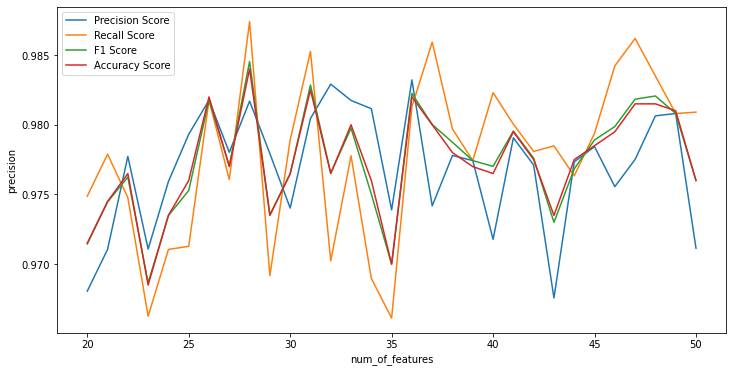

In [48]:
#Visualize Logistic Reg Performance

plt.figure(figsize=(12, 6))
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Accuracy Score')


In [44]:
#Train Random Forest Classifier on GPU

def train_rfc(data, top_n):
    top_n_fetures = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X=data[top_n_fetures]
    y=data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    rfc = RFC(n_estimators=500,
              #split_criterion=1, 
              max_depth=32,
              #max_leaves=-1,
              max_features=1.0,
              #n_bins=128
              )
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    precision = precision_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)   
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [45]:
arr = []
for i in range(20 ,51 ,1):
    precision, recall, f1, accuracy = train_rfc(data, i)
    print('Performance for RFC Model with Top {} features is precision: {}, recall: {}, f1: {}, accuracy: {}'.format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for RFC Model with Top 20 features is precision: 0.9680638722554891, recall: 0.9748743718592965, f1: 0.971457185778668, accuracy: 0.9715
Performance for RFC Model with Top 21 features is precision: 0.9710578842315369, recall: 0.9778894472361809, f1: 0.9744616925388083, accuracy: 0.9745
Performance for RFC Model with Top 22 features is precision: 0.9777327935222672, recall: 0.9747729566094854, f1: 0.9762506316321373, accuracy: 0.9765
Performance for RFC Model with Top 23 features is precision: 0.9710867397806581, recall: 0.9662698412698413, f1: 0.9686723023371457, accuracy: 0.9685
Performance for RFC Model with Top 24 features is precision: 0.9759277833500501, recall: 0.9710578842315369, f1: 0.973486743371686, accuracy: 0.9735
Performance for RFC Model with Top 25 features is precision: 0.9793174767321613, recall: 0.9712820512820513, f1: 0.9752832131822863, accuracy: 0.976
Performance for RFC Model with Top 26 features is precision: 0.9817629179331308, recall: 0.981762917933

In [49]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1', 'accuracy'])    
df

,num_of_features,precision,recall,f1,accuracy
0,20,0.968064,0.974874,0.971457,0.9715
1,21,0.971058,0.977889,0.974462,0.9745
2,22,0.977733,0.974773,0.976251,0.9765
3,23,0.971087,0.966270,0.968672,0.9685
4,24,0.975928,0.971058,0.973487,0.9735
5,25,0.979317,0.971282,0.975283,0.9760
6,26,0.981763,0.981763,0.981763,0.9820
7,27,0.978022,0.976072,0.977046,0.9770
8,28,0.981696,0.987403,0.984541,0.9840
9,29,0.977934,0.969185,0.973540,0.9735


<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

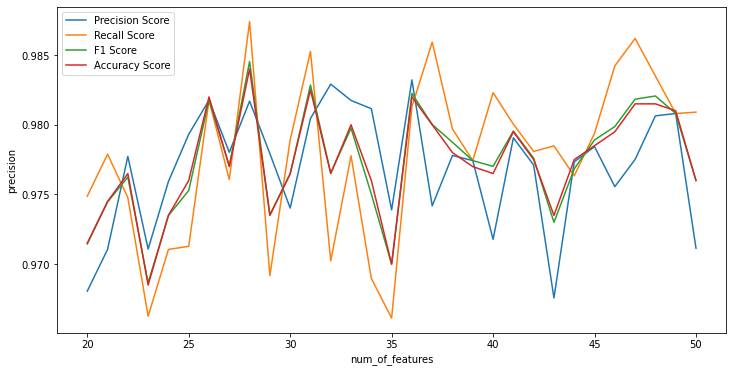

In [50]:
#Visualize RFC Performance

plt.figure(figsize=(12, 6))
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Accuracy Score')


In [ ]:
#Final Random Forest Model

top_n_fetures = mi_score.sort_values(ascending=False).head(40).index.tolist()
X=data[top_n_fetures]
y=data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

rfc = RFC(n_estimators=500,
            #split_criterion=1,
            max_depth=32,
            #max_leaves=-1,
            max_features=1.0,
            #n_bins=128
            )
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test, predict_model='CPU')

precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Performance for RFC Model with Top {} features is precision: {}, recall: {}, f1: {}, accuracy: {}'.format(40, precision, recall, f1, accuracy))


In [ ]:
#Performance

from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))